# **OBJECTIVE**

The goal of this project is to design a scalable database for Uber using the star schema model.

This project starts with a python script cleaning modelling the data according to the following ERD

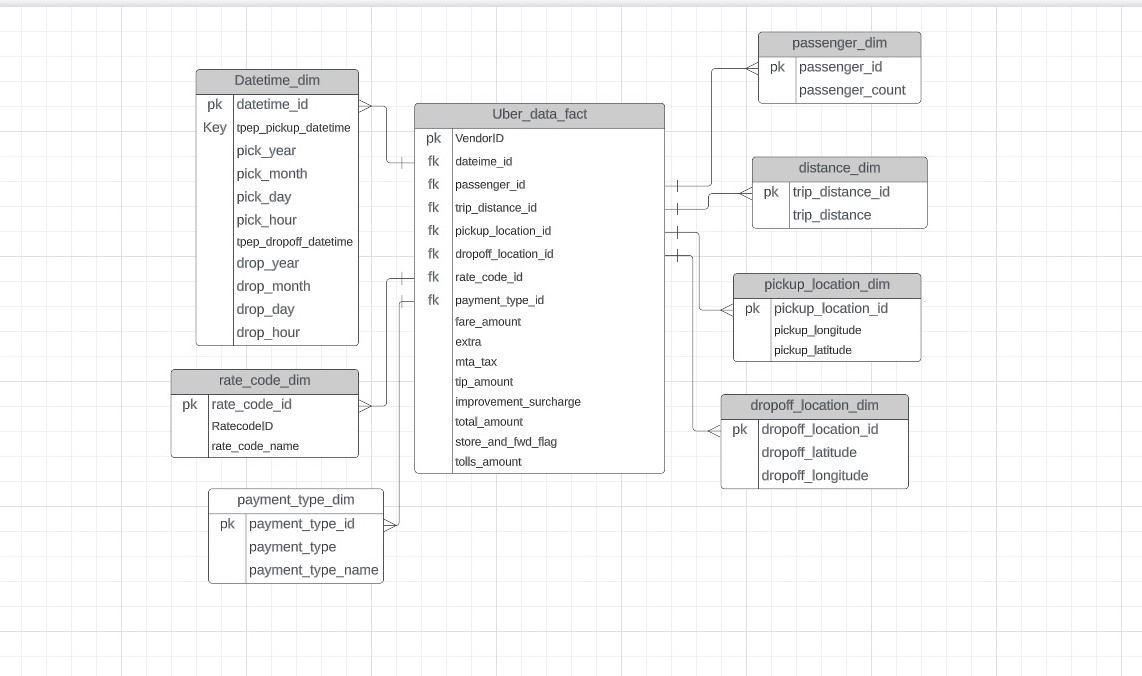

In [25]:
# Import useful libraries

import pandas as pd
import numpy as np
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [26]:
# Read the data

uber_data = pd.read_csv("/content/uber_data.csv")

# Drop duplicates and give index to each row

uber_data = uber_data.drop_duplicates().reset_index(drop=True)
uber_data['trip_id'] = uber_data.index

uber_data.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_id
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.0,0.3,12.35,0
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.0,0.3,15.35,1
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.0,0.3,63.80,2


In [27]:
# Print column names

uber_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'trip_id'],
      dtype='object')

In [28]:
# Check data information/summary

uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   pickup_longitude       100000 non-null  float64
 6   pickup_latitude        100000 non-null  float64
 7   RatecodeID             100000 non-null  int64  
 8   store_and_fwd_flag     100000 non-null  object 
 9   dropoff_longitude      100000 non-null  float64
 10  dropoff_latitude       100000 non-null  float64
 11  payment_type           100000 non-null  int64  
 12  fare_amount            100000 non-null  float64
 13  extra                  100000 non-null  float64
 14  mta_tax                100000 non-nul

# Expand Data for Modelling

## datetime_dim

In [29]:
# To extract useful date columns, convert to datetime

uber_data['tpep_dropoff_datetime'] = pd.to_datetime(uber_data['tpep_dropoff_datetime'])
uber_data['tpep_pickup_datetime'] = pd.to_datetime(uber_data['tpep_pickup_datetime'])



datetime_dim = uber_data.loc[:, ['tpep_dropoff_datetime', 'tpep_pickup_datetime']]
datetime_dim['pick_year'] = datetime_dim['tpep_pickup_datetime'].dt.year
datetime_dim['pick_month'] = datetime_dim['tpep_pickup_datetime'].dt.month
datetime_dim['pick_day'] = datetime_dim['tpep_pickup_datetime'].dt.day
datetime_dim['pick_hour'] = datetime_dim['tpep_pickup_datetime'].dt.hour


datetime_dim['drop_year'] = datetime_dim['tpep_dropoff_datetime'].dt.year
datetime_dim['drop_month'] = datetime_dim['tpep_dropoff_datetime'].dt.month
datetime_dim['drop_day'] = datetime_dim['tpep_dropoff_datetime'].dt.day
datetime_dim['drop_hour'] = datetime_dim['tpep_dropoff_datetime'].dt.hour

datetime_dim['datetime_id'] = datetime_dim.index


datetime_dim.to_csv("datetime_dim.csv")

## passenger_dim

In [30]:
# Extract data for data modelling

passenger_dim = uber_data.loc[:, ['passenger_count']]
passenger_dim['passenger_id'] = passenger_dim.index

passenger_dim.head(2)


passenger_dim.to_csv("passenger_dim.csv")

## distance_dim

In [31]:
# Extract data for data modelling

distance_dim = uber_data.loc[:, ['trip_distance']]
distance_dim['trip_distance_id'] = distance_dim.index

distance_dim.to_csv("distance_dim.csv")

distance_dim.head(2)

,trip_distance,trip_distance_id
0,2.5,0
1,2.9,1


## pickup_location_dim

In [32]:
# Extract data for data modelling

pickup_location_dim = uber_data.loc[:, ['pickup_longitude', 'pickup_latitude']]
pickup_location_dim['pickup_location_id'] = pickup_location_dim.index

pickup_location_dim.to_csv("pickup_location_dim.csv")

pickup_location_dim.head(2)

,pickup_longitude,pickup_latitude,pickup_location_id
0,-73.976746,40.765152,0
1,-73.983482,40.767925,1


## dropoff_location_dim

In [33]:
# Extract data for data modelling

dropoff_location_dim = uber_data.loc[:, ['dropoff_longitude', 'dropoff_latitude']]
dropoff_location_dim['dropoff_location_id'] = dropoff_location_dim.index

dropoff_location_dim.to_csv("dropoff_location_dim.csv")

dropoff_location_dim.head(2)

,dropoff_longitude,dropoff_latitude,dropoff_location_id
0,-74.004265,40.746128,0
1,-74.005943,40.733166,1


## rate_code_dim

In [34]:
# Extract data for data modelling

rate_code_dim = uber_data.loc[:, ['RatecodeID']]
rate_code_dim['rate_code_id'] = rate_code_dim.index


rate_code = {1: 'Standard rate', 2: 'JFK', 3: 'Newark', 4:'Nassau or Westchester', 5:'Negotiated fare', 6: 'Group ride'}

rate_code_dim['rate_code_name'] = rate_code_dim['RatecodeID'].map(rate_code)

rate_code_dim.to_csv("rate_code_dim.csv")

rate_code_dim.head(2)

,RatecodeID,rate_code_id,rate_code_name
0,1,0,Standard rate
1,1,1,Standard rate


## payment_type_dim

In [35]:
# Extract data for data modelling

payment_type_dim = uber_data.loc[:, ['payment_type']]
payment_type_dim.loc[:, 'payment_type_id'] = payment_type_dim.index


payment_types = {1:'Credit card', 2: 'Cash', 3: 'No charge', 4:'Dispute', 5:'Unknown', 6:'Voided trip'}
payment_type_dim.loc[:, 'payment_type_name'] = payment_type_dim['payment_type'].map(payment_types)

payment_type_dim.to_csv("payment_type_dim.csv")

payment_type_dim.head(2)

,payment_type,payment_type_id,payment_type_name
0,1,0,Credit card
1,1,1,Credit card


## fact_dim

In [ ]:
# Merge all tables and extract useful fields for the facts table

new_uber_data = uber_data.merge(datetime_dim, on=['tpep_dropoff_datetime', 'tpep_pickup_datetime'])\
                    .merge(passenger_dim, on='passenger_count')\
                    .merge(distance_dim, on='trip_distance')\
                    .merge(pickup_location_dim, on=['pickup_longitude', 'pickup_latitude'])\
                    .merge(dropoff_location_dim, on=['dropoff_longitude', 'dropoff_latitude'])\
                    .merge(rate_code_dim, on='RatecodeID')\
                    .merge(payment_type_dim, on='payment_type')


In [ ]:
# Create facts  table

fact_dim = new_uber_data.loc[:, ['VendorID', 'datetime_id', 'passenger_id', 'trip_distance_id', 'pickup_location_id',\
                                                                 'dropoff_location_id', 'rate_code_id', 'payment_type_id', 'fare_amount','extra', 'mta_tax',\
                                                                 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'store_and_fwd_flag']]


print(fact_dim.shape)
fact_dim.head(3)

### Write SQL script to design, create database and load data


Using Pg Admin4